In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
import numpy
from matplotlib import pyplot
from scipy import signal

import pywt
from pycwt.helpers import find
from scipy.fft import fft, fftfreq,rfft, rfftfreq


### Utils

In [2]:
import pywt

def plot_wavelet(time, signal, scales, waveletname='cmor1.5-1.0', cmap=plt.cm.seismic, title='Wavelet Transform (Power Spectrum) of signal', ylabel='Period (years)', xlabel='Time (years)', figname=None):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    
    scale0 = 8
    numlevels = 10

    levels = [scale0]
    for ll in range(1, numlevels):
        scale0 *= 2
        levels.append(scale0)

    contourlevels = np.log2(levels)
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, period, np.log2(power),
                     contourlevels, extend='both', cmap=cmap)
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylim(0, 2)
    cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    if not figname:
        plt.show()
        #plt.savefig('wavelet_{}.png'.format(waveletname),
                    #dpi=300, bbox_inches='tight')
    else:
        #plt.savefig(figname, dpi=300, bbox_inches='tight')
        plt.show()
    plt.close('all')

In [3]:
def pipeline(data):

    # Plot Series
    plt.figure(figsize=(10,4),dpi=150)
    plt.plot(data['co2'], c='purple',linewidth=1.5)
    plt.xlabel('Years')
    plt.ylabel('Co2 detrend Modified')
    plt.show()
    yf = rfft(data['co2'].values)
    xf = 1/ rfftfreq(2284,  1/52)

    # Plot FFT
    plt.figure(dpi=150,figsize=(12,4))
    plt.plot(xf, np.abs(yf))
    plt.plot(xf,np.abs(yf), '.',color='black')
    plt.ylabel('Power')
    plt.xlabel('Period (years)')
    plt.xlim(0,2)
    plt.show()
    
    # Plot Wavelet
    dat = data['co2']
    t0 = 0
    dt = 1/52  # In years
    
    N = dat.size
    t = numpy.arange(0, N) * dt + t0
    scales = np.arange(1, 512) #set the wavelet scales
    
    plot_wavelet(t, dat, scales)

### Original data

In [4]:
import statsmodels.datasets
data = statsmodels.datasets.co2.load_pandas().data
data.co2.interpolate(inplace=True)
data['co2'] = signal.detrend(data['co2'], type='linear')

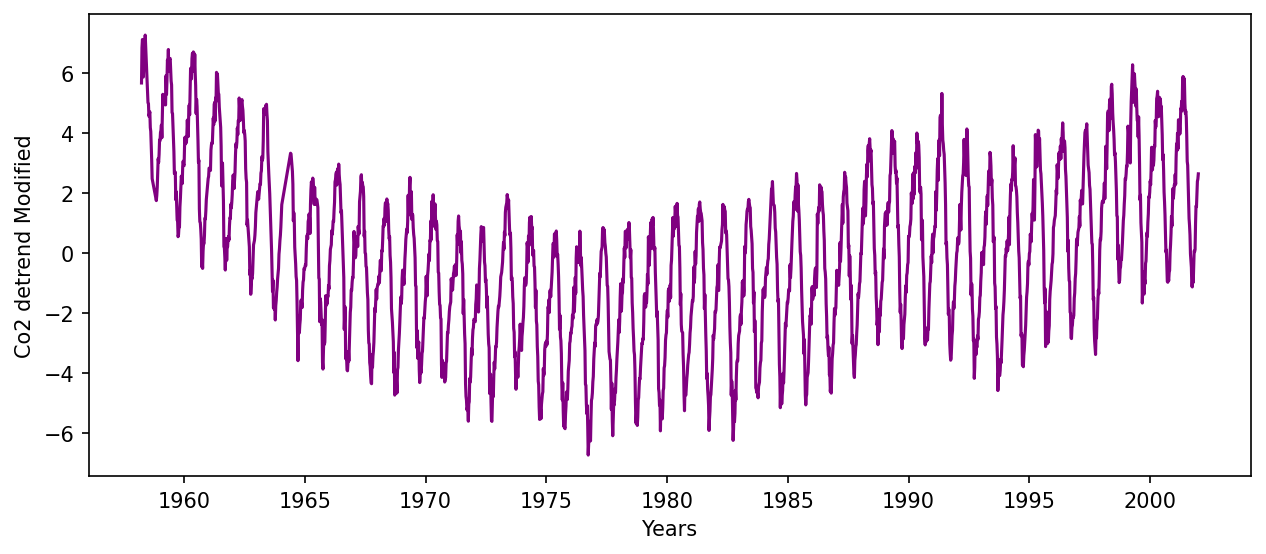

/var/folders/24/hz8c6rbx3r32smymhrvkwbmc0000gn/T/ipykernel_45692/1432192222.py:10: RuntimeWarning: divide by zero encountered in divide
  xf = 1/ rfftfreq(2284,  1/52)


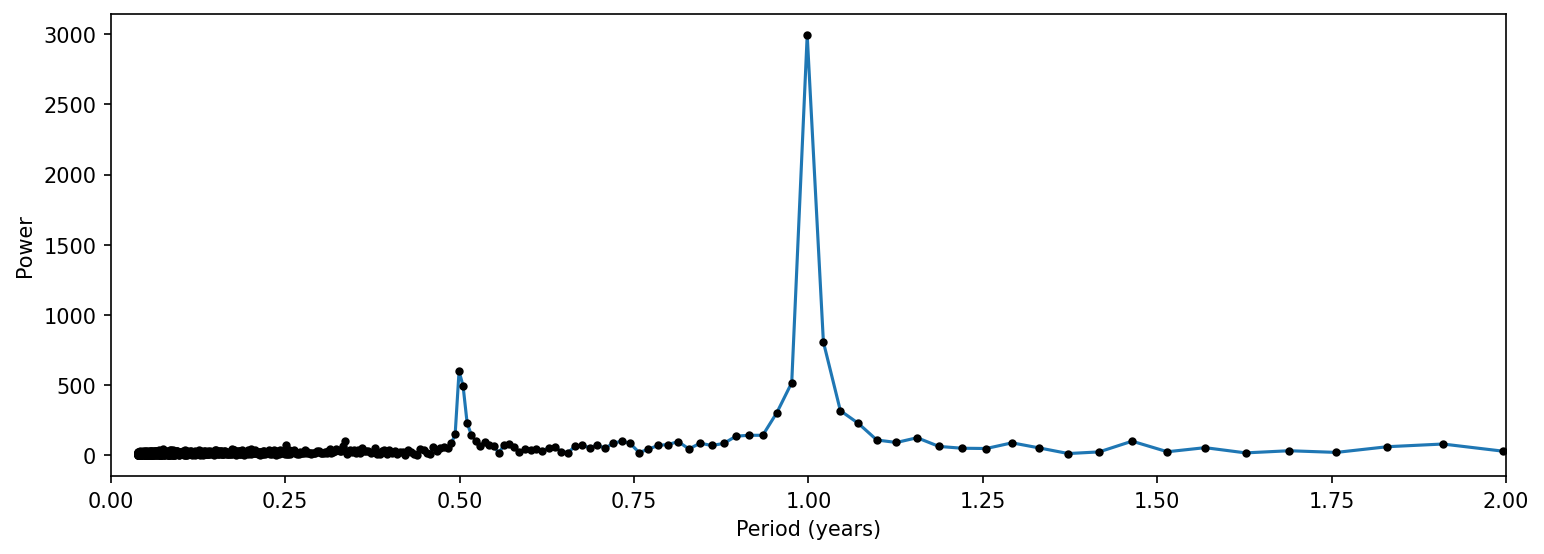

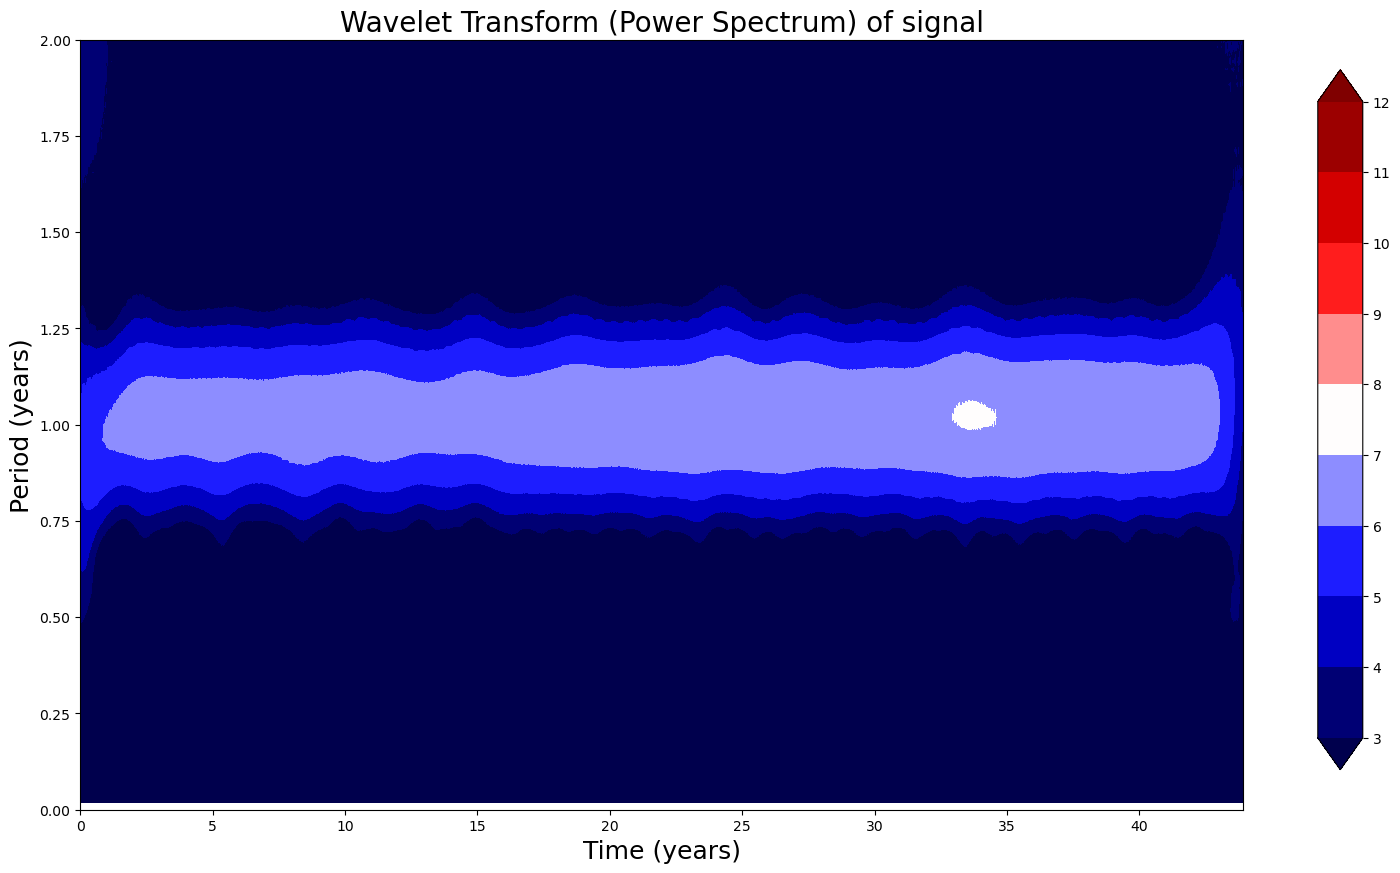

In [5]:
pipeline(data)

### Modified scenario

In [6]:
import statsmodels.datasets
data = statsmodels.datasets.co2.load_pandas().data
data.co2.interpolate(inplace=True)
data['co2'] = signal.detrend(data['co2'], type='linear')

In [7]:
aux = np.zeros((10,2284))
for i in range(10):
    aux[i,:] = np.arange(0,22.84,0.01)

In [8]:
aux = np.zeros((10,2284))
for i in range(10):
    aux[i,:] = np.arange(0,22.84,0.01)

# Perturbation
np.random.seed(2)
data['co2'] += (1)*(np.sin(np.random.normal(20,.5, (10,1)) * aux)).sum(axis=0)

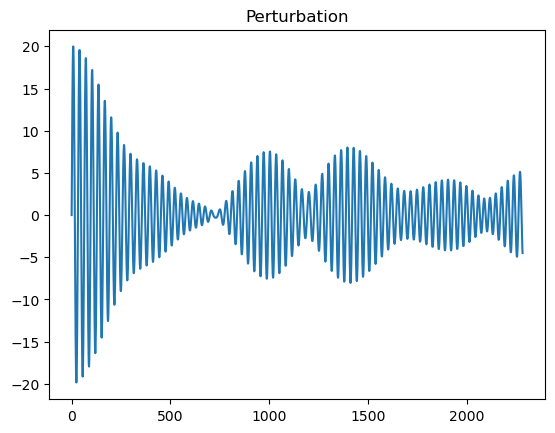

In [9]:
np.random.seed(2)
plt.title('Perturbation')
plt.plot((2)*(np.sin(np.random.normal(20,.5, (10,1)) * aux)).sum(axis=0))
plt.show()

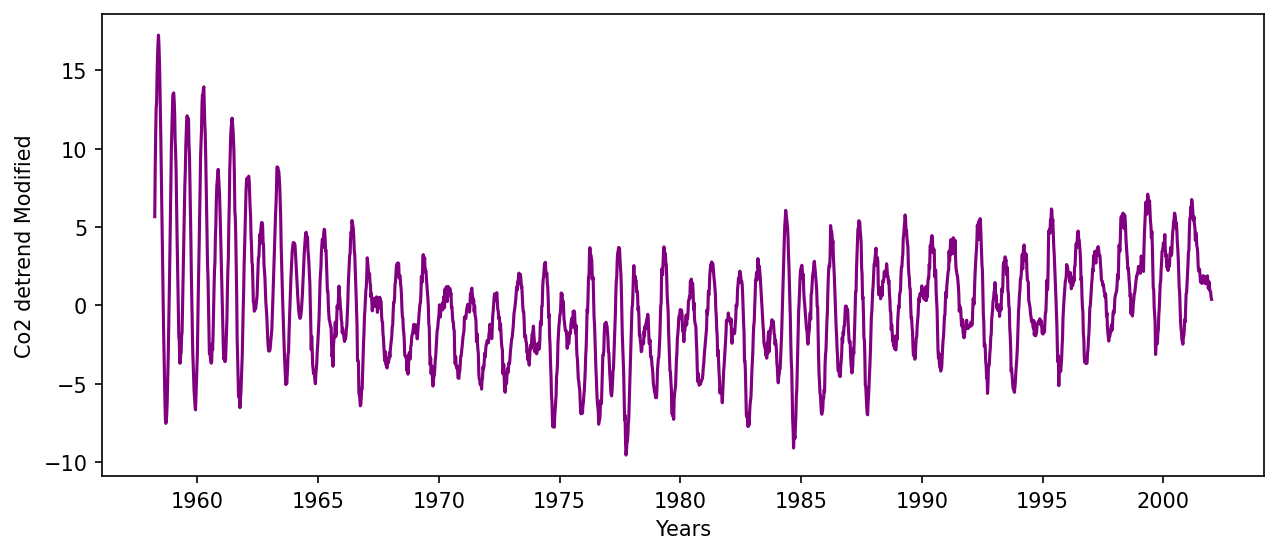

/var/folders/24/hz8c6rbx3r32smymhrvkwbmc0000gn/T/ipykernel_45692/1432192222.py:10: RuntimeWarning: divide by zero encountered in divide
  xf = 1/ rfftfreq(2284,  1/52)


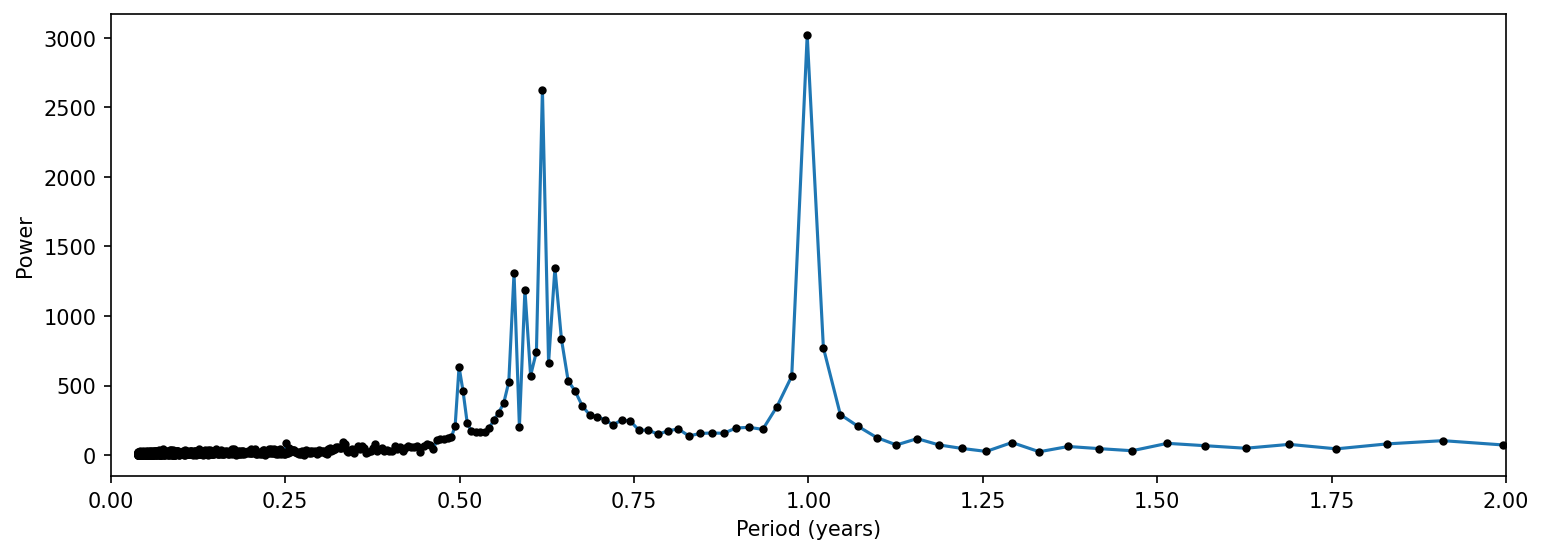

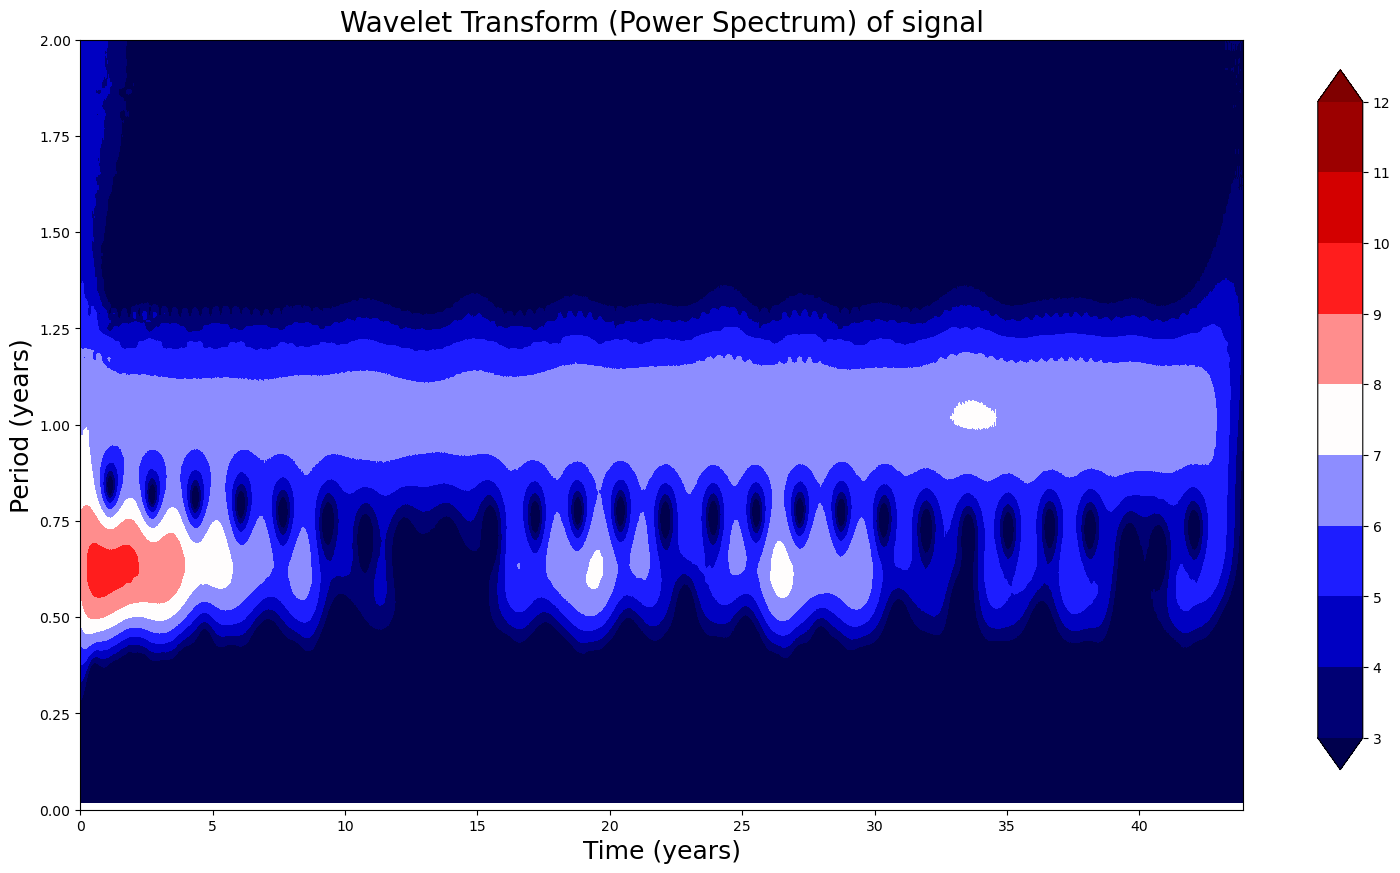

In [10]:
pipeline(data)